## moon data example

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, mixture
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

### create sample data

In [3]:
n_samples = 1500

X, y = datasets.make_moons(n_samples=n_samples, noise=.08, random_state=0)
df = pd.DataFrame(X)
df.columns = ["col1", "col2"]
df['cls'] = y

df.head()

,col1,col2,cls
0,-0.368750,0.953681,0
1,0.894133,0.223444,0
2,2.077294,0.497075,1
3,0.931950,0.125217,0
4,2.041592,0.210389,1


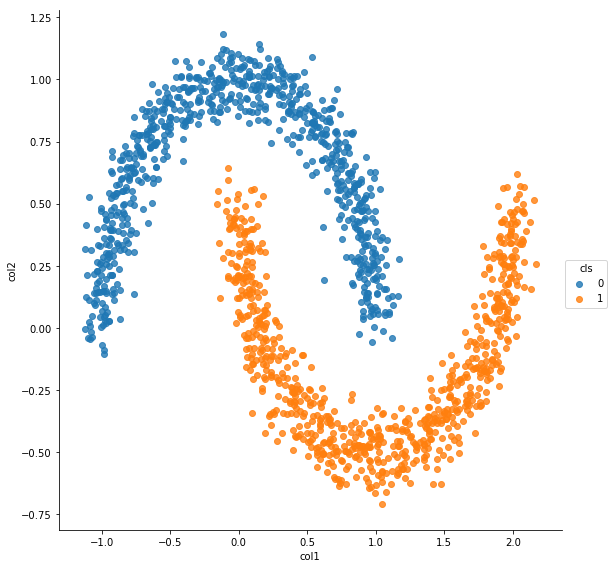

In [4]:
sns.lmplot("col1", "col2", hue="cls", data=df, fit_reg=False, size=8)

### SVC linear

In [5]:
clf = SVC(kernel="linear", C=0.025, probability=True)

In [6]:
clf.fit(X, y)

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
y_pred = clf.predict_proba(X)[:,0:1]

In [8]:
df = pd.DataFrame(X)
df.columns = ["col1", "col2"]
df['cls'] = (0.5<y_pred[:,0]).astype(int)
df.head()

,col1,col2,cls
0,-0.368750,0.953681,1
1,0.894133,0.223444,0
2,2.077294,0.497075,0
3,0.931950,0.125217,0
4,2.041592,0.210389,0


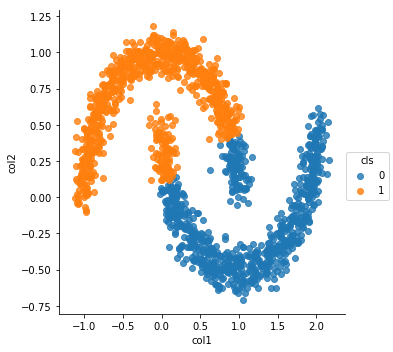

In [9]:
sns.lmplot("col1", "col2", hue="cls", data=df, fit_reg=False)

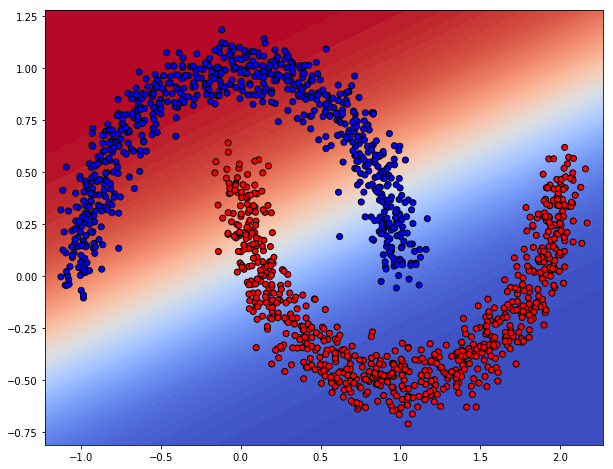

In [10]:
h = .01
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0:1]

cm = plt.cm.coolwarm
cm_bright = ListedColormap(['#0000FF', '#FF0000'])
y_pred = y_pred.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')

### RBF SVM (gaussian kernel)

In [11]:
clf = SVC(gamma=2, C=1, probability=True)

In [12]:
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
y_pred = clf.predict_proba(X)[:,0:1]

In [14]:
df = pd.DataFrame(X)
df.columns = ["col1", "col2"]
df['cls'] = (0.5<y_pred[:,0]).astype(int)
df.head()

,col1,col2,cls
0,-0.368750,0.953681,1
1,0.894133,0.223444,1
2,2.077294,0.497075,0
3,0.931950,0.125217,1
4,2.041592,0.210389,0


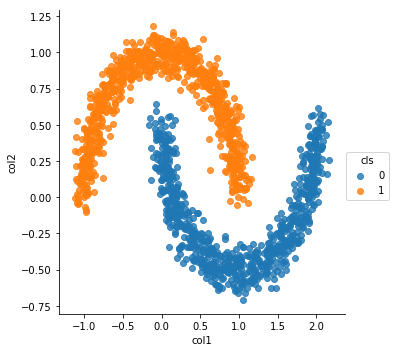

In [15]:
sns.lmplot("col1", "col2", hue="cls", data=df, fit_reg=False)

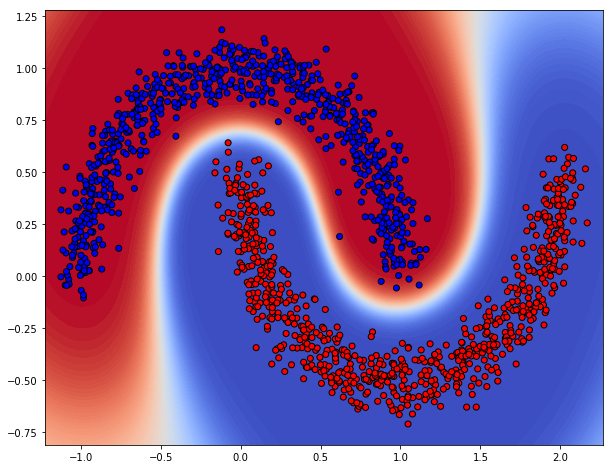

In [16]:
h = .01
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0:1]

cm = plt.cm.coolwarm
cm_bright = ListedColormap(['#0000FF', '#FF0000'])
y_pred = y_pred.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')